Imports

In [124]:
import pandas as pd

## Scarping

In [170]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup
# import numpy as np
# from concurrent.futures import ThreadPoolExecutor, as_completed

# def scrape_lyrics(url, index, total):
#     if pd.isna(url) or not isinstance(url, str):
#         print(f"[{index+1}/{total}] Skipping invalid URL")
#         return np.nan

#     try:
#         print(f"[{index+1}/{total}] Fetching lyrics from: {url}")
#         response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=100)
#         response.raise_for_status()

#         soup = BeautifulSoup(response.text, "html.parser")
#         lyrics_div = soup.find("div", {"data-lyrics-container": "true"})

#         if lyrics_div:
#             lyrics = "\n".join(lyrics_div.stripped_strings)
#             print(f"[{index+1}/{total}] Lyrics found!")
#             return lyrics

#         print(f"[{index+1}/{total}] Lyrics not found on page.")
#         return np.nan

#     except requests.Timeout:
#         print(f"[{index+1}/{total}] Request timed out.")
#         return np.nan
#     except requests.RequestException as e:
#         print(f"[{index+1}/{total}] Request failed: {e}")
#         return np.nan

# file_path = "songs_train.csv"
# df = pd.read_csv(file_path)
# df.drop('Unnamed: 0', axis=1, inplace=True)
# total_rows = len(df)

# max_workers = 100
# lyrics_results = [None] * total_rows

# with ThreadPoolExecutor(max_workers=max_workers) as executor:
#     future_to_index = {executor.submit(scrape_lyrics, df.loc[i, "url"], i, total_rows): i for i in range(total_rows)}

#     for future in as_completed(future_to_index):
#         index = future_to_index[future]
#         try:
#             lyrics_results[index] = future.result()
#         except Exception as e:
#             print(f"[{index+1}/{total_rows}] Unexpected error: {e}")
#             lyrics_results[index] = np.nan

# df["lyrics"] = lyrics_results

# output_path = "songs_with_lyrics.csv"
# df.to_csv(output_path, index=False)

# print(f"\nLyrics scraping completed! Saved to {output_path}")

# lyrics = pd.read_csv('songs_with_lyrics.csv')
# lyrics

# lyrics = lyrics.dropna()
# lyrics.isnull().sum()

# lyrics.to_csv('songs_with_lyrics_dropped_null_row.csv', index=False)

## Load Data

In [125]:
df_lyrics_clean_null = pd.read_csv('songs_with_lyrics_dropped_null_row.csv')
df_lyrics_clean_null = df_lyrics_clean_null.drop(['url'], axis=1)
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  
0     I make enough mistakes\nAnd it feels like she'...  
1     [Verse 1]\nMaybe it's the way you say my name\...  
2     [Intro]\nYeah, Herbo\nG Herbo, G Herbo\nYeah, ...  
3     [Intro]\nOne, two, three, four\n[Verse 1]\nSet...  
4     [Intro]\n(I say a little prayer for you)\n[Ver...  
...                                                 ...  
7310  [Verse 1]\nAyo, as the world turns, the blunt ...  
7311  [Verse 1]\nThis was never the way I planned\nN...  
7312  [Intro: Fatt Father]\nI told y'all, motherfuck...  
7313  [Intro]\nYeah\nI'm looking at you, uh\nSexy, y...  
7314  [Verse 1]\nKarma police, arrest this man\nHe t...  

[7315 rows x 5 columns]

## Preprocess

## Lowercasing

In [126]:
df_lyrics_clean_null['lyrics'] = df_lyrics_clean_null['lyrics'].str.lower()
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  
0     i make enough mistakes\nand it feels like she'...  
1     [verse 1]\nmaybe it's the way you say my name\...  
2     [intro]\nyeah, herbo\ng herbo, g herbo\nyeah, ...  
3     [intro]\none, two, three, four\n[verse 1]\nset...  
4     [intro]\n(i say a little prayer for you)\n[ver...  
...                                                 ...  
7310  [verse 1]\nayo, as the world turns, the blunt ...  
7311  [verse 1]\nthis was never the way i planned\nn...  
7312  [intro: fatt father]\ni told y'all, motherfuck...  
7313  [intro]\nyeah\ni'm looking at you, uh\nsexy, y...  
7314  [verse 1]\nkarma police, arrest this man\nhe t...  

[7315 rows x 5 columns]

### Remove brackets

In [127]:
# Remove [] and all text inside it, it just indicates the part of the song
# Remove the () symbol, keep the text inside it
import re

df_lyrics_clean_null['lyrics'] = df_lyrics_clean_null['lyrics'].apply(lambda x: re.sub(r'\[.*?\]', '', x))
df_lyrics_clean_null['lyrics'] = df_lyrics_clean_null['lyrics'].apply(lambda x: re.sub(r'\(|\)', '', x))
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  
0     i make enough mistakes\nand it feels like she'...  
1     \nmaybe it's the way you say my name\nmaybe it...  
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...  
3     \none, two, three, four\n\nsettle down with me...  
4     \ni say a little prayer for you\n\nthe moment ...  
...                                                 ...  
7310  \nayo, as the world turns, the blunt burns\nwh...  
7311  \nthis was never the way i planned\nnot my int...  
7312  \ni told y'all, motherfuckers, i was coming ba...  
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...  
7314  \nkarma police, arrest this man\nhe talks in m...  

[7315 rows x 5 columns]

### Split for preprocess

In [128]:
# Split the lyrics into a list of words by whitespace and newline
df_lyrics_clean_null['lyrics_split'] = df_lyrics_clean_null['lyrics'].apply(lambda x: re.split(r'\s+', x.strip()))

# Display the updated DataFrame
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  
0     [i, make, enough, mistakes, and, it, feels, li...  
1     [maybe, it's, the, way, you, say, my, name, ma...  
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...  
3     [one,, two,, three,, four, settle, down, with,...  
4     [i, say, a, little, prayer, for, you, the, mom...  
...                                                 ...  
7310  [ayo,, as, the, world, turns,, the, blunt, bur...  
7311  [this, was, never, the, way, i, planned, not, ...  
7312  [i, told, y'all,, motherfuckers,, i, was, comi...  
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...  
7314  [karma, police,, arrest, this, man, he, talks,...  

[7315 rows x 6 columns]

### Replace words with in' ending

In [129]:
from collections import Counter
# Define a function to replace words ending with "in" to "ing"
def replace_in_with_ing(word):
    if word.endswith("in'") and len(word) > 3:  # Check if the word ends with "in" and is longer than 3 characters
        return word.replace(word[-1], "g")  # Add "g" to the end
    return word

# Apply the function to the 'lyrics_split' column
df_lyrics_clean_null['lyrics_split'] = df_lyrics_clean_null['lyrics_split'].apply(
    lambda tokens: [replace_in_with_ing(word) for word in tokens]
)

all_words = []
for tokens in df_lyrics_clean_null["lyrics_split"]:
    all_words.extend(tokens)

# Apply the function to all words in the list
all_words = [replace_in_with_ing(word) for word in all_words]

# Count the most common words again
word_counts = Counter(all_words)
common_words = word_counts.most_common(200)

# Display the most common words
common_words

[('i', 58779),
 ('the', 53798),
 ('you', 44411),
 ('a', 32614),
 ('and', 29154),
 ('to', 27515),
 ('my', 25058),
 ('in', 19420),
 ('me', 19157),
 ('it', 18214),
 ("i'm", 17998),
 ('that', 16982),
 ('on', 15674),
 ('of', 13142),
 ('like', 12722),
 ('your', 11997),
 ('with', 10988),
 ("don't", 10049),
 ('all', 10036),
 ('for', 9837),
 ('but', 9800),
 ('we', 9456),
 ('know', 9144),
 ('be', 8795),
 ('got', 8618),
 ('is', 8593),
 ('up', 8502),
 ('this', 8337),
 ('just', 8273),
 ('so', 7715),
 ('they', 7387),
 ('when', 7078),
 ('get', 7062),
 ("it's", 7018),
 ('no', 6549),
 ('she', 6226),
 ('yeah', 6155),
 ('was', 6142),
 ('what', 6056),
 ('if', 5743),
 ('yeah,', 5559),
 ('out', 5387),
 ("ain't", 5361),
 ('do', 5179),
 ('love', 4910),
 ('can', 4628),
 ('now', 4548),
 ('at', 4424),
 ('go', 4335),
 ('not', 4203),
 ("'cause", 4106),
 ('he', 4076),
 ('her', 3964),
 ('never', 3960),
 ('fuck', 3947),
 ("can't", 3748),
 ('from', 3742),
 ('one', 3728),
 ('wanna', 3722),
 ("you're", 3656),
 ('make', 

### Expand Contraction

In [130]:
# Expand contractions
import contractions
df_lyrics_clean_null['lyrics_contracted'] = df_lyrics_clean_null['lyrics_split'].apply(
	lambda x: contractions.fix(' '.join(x))
)
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  
0     i make enough mistakes and it feels like she i...  
1     maybe it is the way you say my name maybe it i...  
2     yeah, herbo g herbo, g herbo yeah, i got bitch...  
3     one, two, three, four settle down with me cove...  
4     i say a little prayer for you the moment i wak...  
...                                                 ...  
7310  ayo, as the world turns, the blunt burns who y...  
7311  this was never the way i planned not my intent...  
7312  i told you all, motherfuckers, i was coming ba...  
7313  yeah i am looking at you, uh sexy, yeah god, y...  
7314  karma police, arrest this man he talks in math...  

[7315 rows x 7 columns]

### Tokenizing

In [131]:
from textblob import TextBlob
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['lyrics_contracted'].apply(lambda x: TextBlob(x).words)
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [i, make, enough, mistakes, and, it, feels, li...  
1     [maybe, it, is, the, way, you, say, my, name, ...  
2     [yeah, herbo, g, herbo, g, herbo, yeah, i, got...  
3     [one, two, three, four, settle, down, with, me...  
4     [i, say, a, little, prayer, for, you, the, mom...  
...                                                 ...  
7310  [ayo, as, the, world, turns, the, blunt, burns...  
7311  [this, was, never, the, way, i, planned, not, ...  
7312  [i, told, you, all, motherfuckers, i, was, com...  
7313  [yeah, i, am, looking, at, you, uh, sexy, yeah...  
7314  [karma, police, arrest, this, man, he, talks, ...  

[7315 rows x 8 columns]

### Remove special chars and numbers

In [132]:
# Remove special chars and numbers
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['token_lyrics'].apply(lambda x: [re.sub(r'[^a-zA-Z]', '', i) for i in x])
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['token_lyrics'].apply(lambda x: [i for i in x if i != ''])
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [i, make, enough, mistakes, and, it, feels, li...  
1     [maybe, it, is, the, way, you, say, my, name, ...  
2     [yeah, herbo, g, herbo, g, herbo, yeah, i, got...  
3     [one, two, three, four, settle, down, with, me...  
4     [i, say, a, little, prayer, for, you, the, mom...  
...                                                 ...  
7310  [ayo, as, the, world, turns, the, blunt, burns...  
7311  [this, was, never, the, way, i, planned, not, ...  
7312  [i, told, you, all, motherfuckers, i, was, com...  
7313  [yeah, i, am, looking, at, you, uh, sexy, yeah...  
7314  [karma, police, arrest, this, man, he, talks, ...  

[7315 rows x 8 columns]

### Remove stopwords

In [133]:
# Stopwords removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['token_lyrics'].apply(lambda x: [i for i in x if i not in stop_words])
df_lyrics_clean_null

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [make, enough, mistakes, feels, like, one, hea...  
1     [maybe, way, say, name, maybe, way, play, game...  
2     [yeah, herbo, g, herbo, g, herbo, yeah, got, b...  
3     [one, two, three, four, settle, cover, cuddle,...  
4     [say, little, prayer, moment, wake, put, makeu...  
...                                                 ...  
7310  [ayo, world, turns, blunt, burns, getting, nic...  
7311  [never, way, planned, intention, got, brave, d...  
7312  [told, motherfuckers, coming, back, oh, shit, ...  
7313  [yeah, looking, uh, sexy, yeah, god, ass, fat,...  
7314  [karma, police, arrest, man, talks, maths, buz...  

[7315 rows x 8 columns]

### Remove filler words

In [134]:
filler_words = {"uh", "um", "yeah", "just", "you know", "well", "so", "okay", "actually", "basically", "literally", "right", "hmm", "oh", "ah","yo","lil","uhh","ooh","ayy","woo","la","na","hey","ho",
                "huh","whoa","nah","nahh","whoo","woah","whoa","yuh","yea","yeahh","ho", "huh", 'ya', 'as', 
                "like", "know", "go", "get", "got"}

# Function to remove filler words from tokenized lyrics
def remove_fillers(token_list):
    # Convert string representation of list to actual list
    tokens = eval(token_list) if isinstance(token_list, str) else token_list
    return [word for word in tokens if word.lower() not in filler_words]

# Apply the function to the 'token_lyrics' column
df_lyrics_clean_null["token_lyrics"] = df_lyrics_clean_null["token_lyrics"].apply(remove_fillers)

# Display the updated dataframe
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [make, enough, mistakes, feels, one, hears, th...  
1     [maybe, way, say, name, maybe, way, play, game...  
2     [herbo, g, herbo, g, herbo, bitches, bitches, ...  
3     [one, two, three, four, settle, cover, cuddle,...  
4     [say, little, prayer, moment, wake, put, makeu...  
...                                                 ...  
7310  [ayo, world, turns, blunt, burns, getting, nic...  
7311  [never, way, planned, intention, brave, drink,...  
7312  [told, motherfuckers, coming, back, shit, nigg...  
7313  [looking, sexy, god, ass, fat, meaning, want, ...  
7314  [karma, police, arrest, man, talks, maths, buz...  

[7315 rows x 8 columns]

In [135]:
# Remove single character tokens
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['token_lyrics'].apply(lambda x: [word for word in x if len(word) > 1])
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [make, enough, mistakes, feels, one, hears, th...  
1     [maybe, way, say, name, maybe, way, play, game...  
2     [herbo, herbo, herbo, bitches, bitches, name, ...  
3     [one, two, three, four, settle, cover, cuddle,...  
4     [say, little, prayer, moment, wake, put, makeu...  
...                                                 ...  
7310  [ayo, world, turns, blunt, burns, getting, nic...  
7311  [never, way, planned, intention, brave, drink,...  
7312  [told, motherfuckers, coming, back, shit, nigg...  
7313  [looking, sexy, god, ass, fat, meaning, want, ...  
7314  [karma, police, arrest, man, talks, maths, buz...  

[7315 rows x 8 columns]

### Lemmatize

In [136]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))  # Join tokens into a single string for processing
    return [token.lemma_ for token in doc]  # Extract lemmatized tokens

# Apply the lemmatization function to the DataFrame column
df_lyrics_clean_null['token_lyrics'] = df_lyrics_clean_null['token_lyrics'].apply(lemmatize_tokens)

# Display the updated DataFrame
df_lyrics_clean_null

title             artist  year   views  \
0                  Untitled  Rex Orange County  2017  260112   
1                Dandelions            Ruth B.  2017  221563   
2                    I Like            G Herbo  2017  197179   
3                   Kiss Me         Ed Sheeran  2011  402274   
4     I Say A Little Prayer    Aretha Franklin  1968  315395   
...                     ...                ...   ...     ...   
7310             Ganja Burn        Nicki Minaj  2018  566233   
7311        I Kissed a Girl         Katy Perry  2008  319403   
7312        One Shot 2 Shot             Eminem  2004  191019   
7313                Frontin  Pharrell Williams  2003  195022   
7314           Karma Police          Radiohead  1997  694000   

                                                 lyrics  \
0     i make enough mistakes\nand it feels like she'...   
1     \nmaybe it's the way you say my name\nmaybe it...   
2     \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3     \none, two, three, four\n\nsettle down with me...   
4     \ni say a little prayer for you\n\nthe moment ...   
...                                                 ...   
7310  \nayo, as the world turns, the blunt burns\nwh...   
7311  \nthis was never the way i planned\nnot my int...   
7312  \ni told y'all, motherfuckers, i was coming ba...   
7313  \nyeah\ni'm looking at you, uh\nsexy, yeah\ngo...   
7314  \nkarma police, arrest this man\nhe talks in m...   

                                           lyrics_split  \
0     [i, make, enough, mistakes, and, it, feels, li...   
1     [maybe, it's, the, way, you, say, my, name, ma...   
2     [yeah,, herbo, g, herbo,, g, herbo, yeah,, i, ...   
3     [one,, two,, three,, four, settle, down, with,...   
4     [i, say, a, little, prayer, for, you, the, mom...   
...                                                 ...   
7310  [ayo,, as, the, world, turns,, the, blunt, bur...   
7311  [this, was, never, the, way, i, planned, not, ...   
7312  [i, told, y'all,, motherfuckers,, i, was, comi...   
7313  [yeah, i'm, looking, at, you,, uh, sexy,, yeah...   
7314  [karma, police,, arrest, this, man, he, talks,...   

                                      lyrics_contracted  \
0     i make enough mistakes and it feels like she i...   
1     maybe it is the way you say my name maybe it i...   
2     yeah, herbo g herbo, g herbo yeah, i got bitch...   
3     one, two, three, four settle down with me cove...   
4     i say a little prayer for you the moment i wak...   
...                                                 ...   
7310  ayo, as the world turns, the blunt burns who y...   
7311  this was never the way i planned not my intent...   
7312  i told you all, motherfuckers, i was coming ba...   
7313  yeah i am looking at you, uh sexy, yeah god, y...   
7314  karma police, arrest this man he talks in math...   

                                           token_lyrics  
0     [make, enough, mistake, feel, one, hear, thing...  
1     [maybe, way, say, name, maybe, way, play, game...  
2     [herbo, herbo, herbo, bitch, bitch, name, herb...  
3     [one, two, three, four, settle, cover, cuddle,...  
4     [say, little, prayer, moment, wake, put, makeu...  
...                                                 ...  
7310  [ayo, world, turn, blunt, burn, get, nicki, wa...  
7311  [never, way, plan, intention, brave, drink, ha...  
7312  [tell, motherfucker, come, back, shit, nigga, ...  
7313  [look, sexy, god, ass, fat, meaning, want, sou...  
7314  [karma, police, arrest, man, talk, math, buzz,...  

[7315 rows x 8 columns]

In [137]:
from collections import Counter
all_words = []
for tokens in df_lyrics_clean_null["token_lyrics"]:
    # words = ast.literal_eval(tokens)  # Convert string representation of list back to list
    all_words.extend(tokens)

# Count the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(200)
common_words

[('want', 8285),
 ('say', 6689),
 ('love', 6413),
 ('make', 5834),
 ('bitch', 5592),
 ('see', 5110),
 ('fuck', 5036),
 ('nigga', 4949),
 ('come', 4914),
 ('shit', 4605),
 ('tell', 4578),
 ('one', 4546),
 ('go', 4400),
 ('time', 4395),
 ('let', 4387),
 ('take', 4360),
 ('feel', 4190),
 ('never', 4035),
 ('back', 3972),
 ('baby', 3834),
 ('think', 3710),
 ('would', 3674),
 ('niggas', 3612),
 ('look', 3425),
 ('man', 3371),
 ('need', 3347),
 ('girl', 3144),
 ('way', 3107),
 ('give', 2924),
 ('could', 2918),
 ('keep', 2603),
 ('we', 2582),
 ('good', 2491),
 ('call', 2458),
 ('life', 2427),
 ('day', 2338),
 ('leave', 2291),
 ('put', 2238),
 ('still', 2171),
 ('thing', 2109),
 ('talk', 2076),
 ('run', 2066),
 ('try', 1988),
 ('night', 1967),
 ('money', 1964),
 ('boy', 1933),
 ('gon', 1806),
 ('even', 1793),
 ('really', 1767),
 ('well', 1748),
 ('every', 1727),
 ('fucking', 1727),
 ('hold', 1681),
 ('hit', 1660),
 ('new', 1649),
 ('mind', 1636),
 ('heart', 1633),
 ('hear', 1625),
 ('real', 16

In [138]:
df_lyrics_clean_null.drop(columns=['lyrics_split', 'lyrics_contracted'], inplace=True)
df_lyrics_clean_null.head()

title             artist  year   views  \
0               Untitled  Rex Orange County  2017  260112   
1             Dandelions            Ruth B.  2017  221563   
2                 I Like            G Herbo  2017  197179   
3                Kiss Me         Ed Sheeran  2011  402274   
4  I Say A Little Prayer    Aretha Franklin  1968  315395   

                                              lyrics  \
0  i make enough mistakes\nand it feels like she'...   
1  \nmaybe it's the way you say my name\nmaybe it...   
2  \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3  \none, two, three, four\n\nsettle down with me...   
4  \ni say a little prayer for you\n\nthe moment ...   

                                        token_lyrics  
0  [make, enough, mistake, feel, one, hear, thing...  
1  [maybe, way, say, name, maybe, way, play, game...  
2  [herbo, herbo, herbo, bitch, bitch, name, herb...  
3  [one, two, three, four, settle, cover, cuddle,...  
4  [say, little, prayer, moment, wake, put, makeu...

## Modelling

### Baseline Model

In [139]:
import numpy as np

np.random.seed(42)  # For reproducibility
n_clusters = 2  # Define the number of clusters for random assignment
df_lyrics_clean_null['random_cluster'] = np.random.randint(0, n_clusters, size=len(df_lyrics_clean_null))

# Display the first few rows with baseline predictions
df_lyrics_clean_null.head()

title             artist  year   views  \
0               Untitled  Rex Orange County  2017  260112   
1             Dandelions            Ruth B.  2017  221563   
2                 I Like            G Herbo  2017  197179   
3                Kiss Me         Ed Sheeran  2011  402274   
4  I Say A Little Prayer    Aretha Franklin  1968  315395   

                                              lyrics  \
0  i make enough mistakes\nand it feels like she'...   
1  \nmaybe it's the way you say my name\nmaybe it...   
2  \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3  \none, two, three, four\n\nsettle down with me...   
4  \ni say a little prayer for you\n\nthe moment ...   

                                        token_lyrics  random_cluster  
0  [make, enough, mistake, feel, one, hear, thing...               0  
1  [maybe, way, say, name, maybe, way, play, game...               1  
2  [herbo, herbo, herbo, bitch, bitch, name, herb...               0  
3  [one, two, three, four, settle, cover, cuddle,...               0  
4  [say, little, prayer, moment, wake, put, makeu...               0

#### Evaluation

### Feature Extraction

In [140]:
from gensim.models import Word2Vec
import gensim.downloader
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Combine tokens back into strings
df_lyrics_clean_null['lyrics_combined'] = df_lyrics_clean_null['token_lyrics'].apply(lambda x: ' '.join(x))
# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=df_lyrics_clean_null['lyrics_combined'], vector_size=300, window=8, min_count=2, workers=1, seed=42)
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df_lyrics_clean_null['vector'] = df_lyrics_clean_null['lyrics_combined'].apply(lambda tokens: get_sentence_vector(tokens, word2vec_model))
X = np.vstack(df_lyrics_clean_null['vector'].values)
X.shape

(7315, 300)

In [141]:
df_lyrics_clean_null['random_cluster'] = df_lyrics_clean_null['random_cluster'].astype(int)

if len(set(df_lyrics_clean_null['random_cluster'])) > 1:
    silhouette_avg = silhouette_score(X, df_lyrics_clean_null['random_cluster'])
    print(f"Silhouette Score for Random Clusters: {silhouette_avg}")
else:
    print("Silhouette Score cannot be calculated (only one cluster).")

Silhouette Score for Random Clusters: -0.00011816067535716995


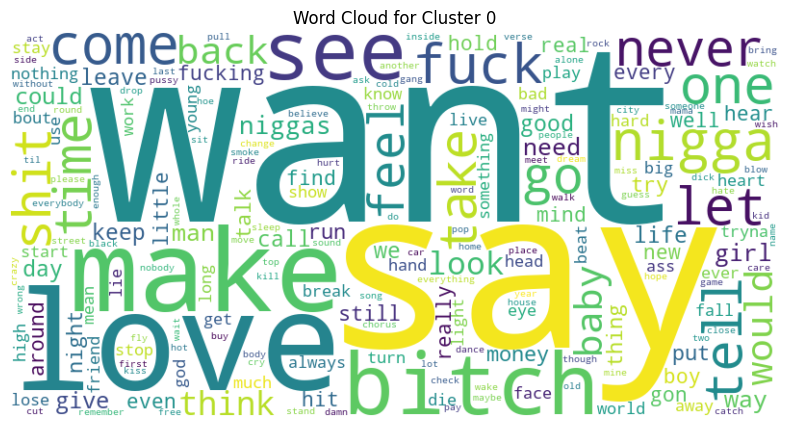

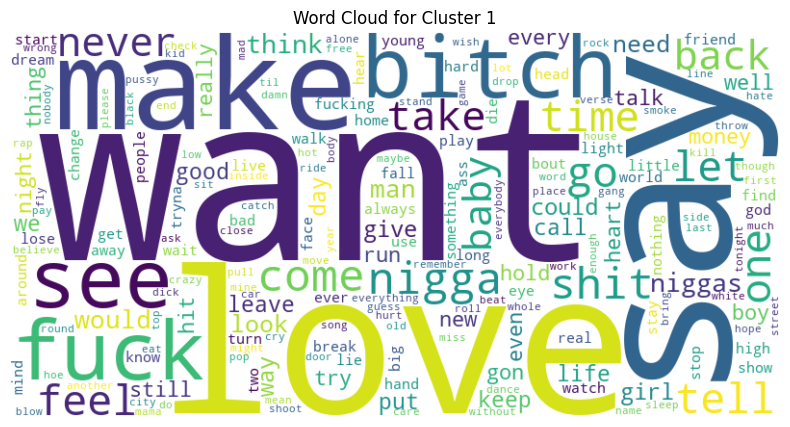

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['random_cluster'] == cluster_number]['token_lyrics']
    
    # Flatten the list of words for the cluster
    words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    word_freq = Counter(words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_number}")
    plt.show()

for cluster in range(2):
    plot_wordcloud(cluster)

In [143]:
# Analyze words in lyrics for each cluster
cluster_word_counts = {}

# Iterate through each cluster
for cluster_id in set(df_lyrics_clean_null['random_cluster']):
    # Combine all tokenized lyrics for the current cluster
    cluster_tokens = df_lyrics_clean_null[df_lyrics_clean_null['random_cluster'] == cluster_id]['token_lyrics'].sum()
    
    # Count the frequency of each word
    word_counts = Counter(cluster_tokens)
    
    # Store the word counts for the cluster
    cluster_word_counts[cluster_id] = word_counts.most_common(20)  # Top 10 words

# Display the most common words for each cluster
for cluster_id, words in cluster_word_counts.items():
    print(f"Cluster {cluster_id}:")
    for word, count in words:
        print(f"  {word}: {count}")
    print()

Cluster 0:
  want: 4258
  say: 3471
  love: 3101
  make: 2968
  bitch: 2769
  see: 2522
  nigga: 2498
  come: 2490
  fuck: 2423
  one: 2333
  tell: 2333
  shit: 2263
  take: 2230
  let: 2200
  time: 2197
  go: 2085
  never: 2035
  feel: 1988
  back: 1959
  baby: 1945

Cluster 1:
  want: 4027
  love: 3312
  say: 3218
  make: 2866
  bitch: 2823
  fuck: 2613
  see: 2588
  nigga: 2451
  come: 2424
  shit: 2342
  go: 2315
  tell: 2245
  one: 2213
  feel: 2202
  time: 2198
  let: 2187
  take: 2130
  back: 2013
  never: 2000
  baby: 1889



### Train KMeans

Number of clusters: 2, Inertia: 768.1067352561678, Silhouette Score: 0.16844713669005032
Number of clusters: 3, Inertia: 708.9765512162109, Silhouette Score: 0.15110314533658697
Number of clusters: 4, Inertia: 661.0807944158673, Silhouette Score: 0.11170001990958701
Number of clusters: 5, Inertia: 625.3510488881705, Silhouette Score: 0.11343346072748454
Number of clusters: 6, Inertia: 599.9936383102863, Silhouette Score: 0.09818581973269568
Number of clusters: 7, Inertia: 580.0391389802334, Silhouette Score: 0.08012244476879982
Number of clusters: 8, Inertia: 561.8990815539231, Silhouette Score: 0.08336705935081645
Number of clusters: 9, Inertia: 548.6552927810721, Silhouette Score: 0.08141861733380462
Number of clusters: 10, Inertia: 536.3740290800808, Silhouette Score: 0.07586543034058171
Number of clusters: 11, Inertia: 525.6017552464577, Silhouette Score: 0.07816460438401394
Number of clusters: 12, Inertia: 516.2828328257399, Silhouette Score: 0.07307516467708136
Number of clusters

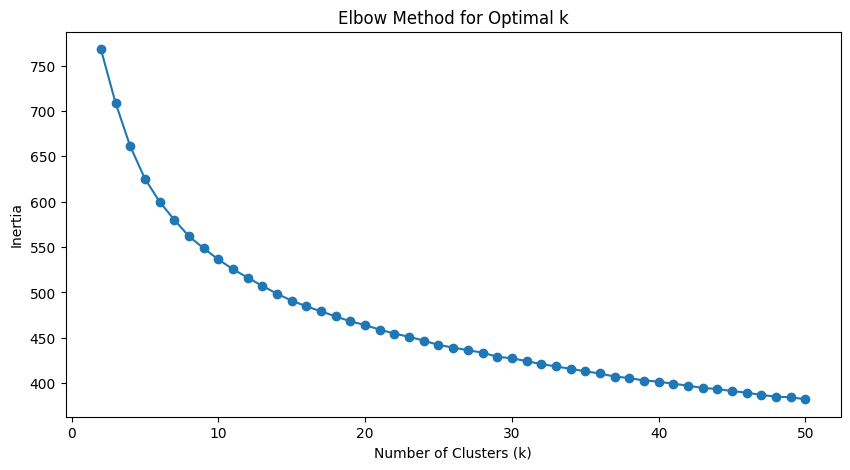

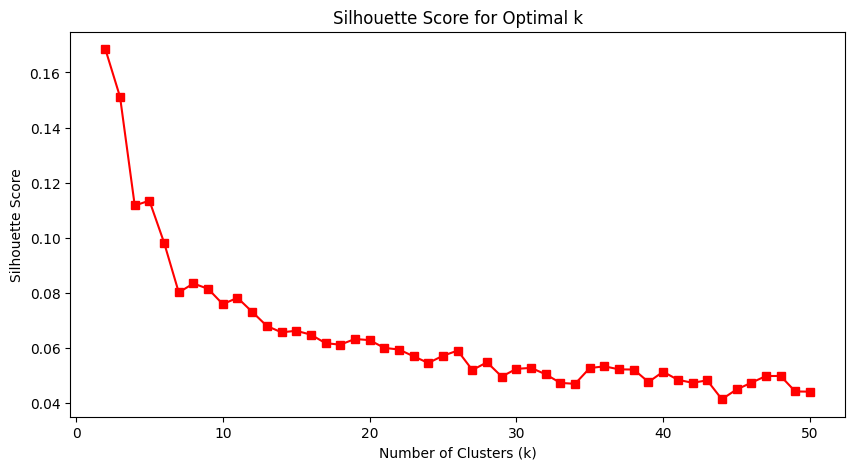

2

In [144]:
inertia = []
silhouette_scores = []
k_values = range(2, 51)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {k}, Inertia: {kmeans.inertia_}, Silhouette Score: {silhouette_avg}")

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

# Find optimal k based on silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_k

#### Visualize Cluster

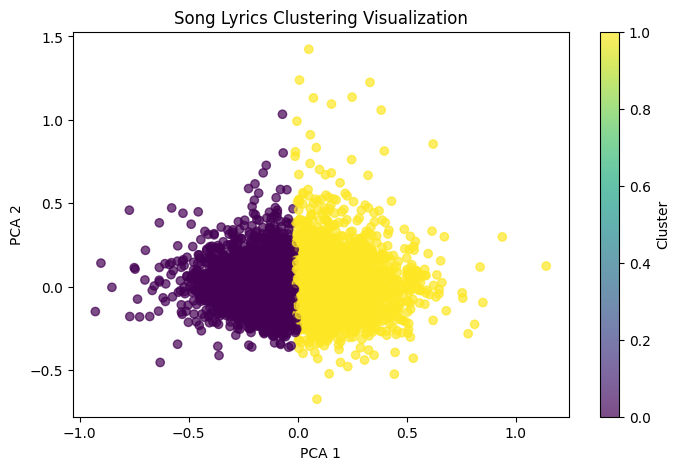

In [145]:
# Cluster Lyrics
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_lyrics_clean_null['cluster'] = kmeans.fit_predict(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_lyrics_clean_null['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Song Lyrics Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()

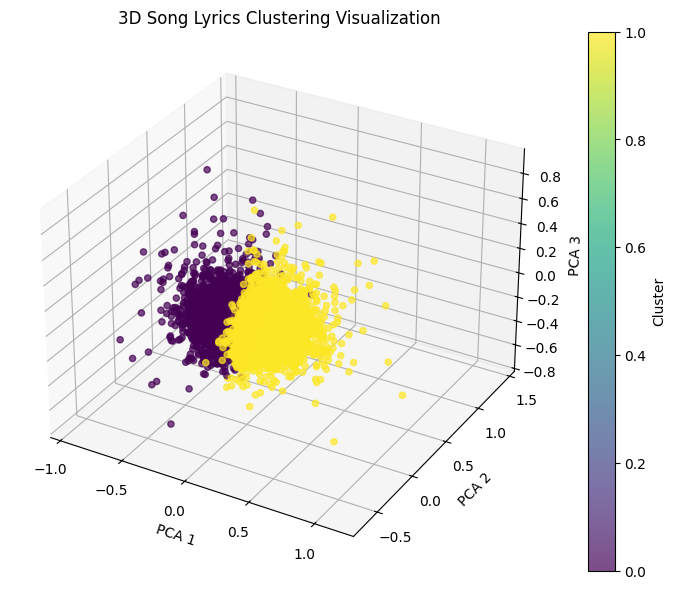

In [146]:
# Reduce to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=df_lyrics_clean_null['cluster'], cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Song Lyrics Clustering Visualization")

# Add color bar
plt.colorbar(scatter, label="Cluster")
plt.show()

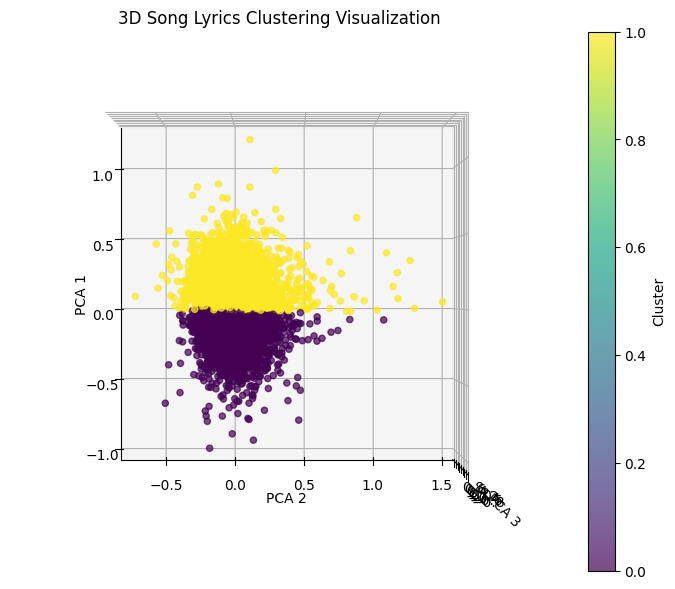

In [147]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=df_lyrics_clean_null['cluster'], cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Song Lyrics Clustering Visualization")
ax.view_init(elev=-90, azim=0) 
# Add color bar
plt.colorbar(scatter, label="Cluster")
plt.show()

#### Cluster lyrics analysis

In [148]:
# Analyze words in lyrics for each cluster
cluster_word_counts = {}

# Iterate through each cluster
for cluster_id in set(df_lyrics_clean_null['cluster']):
    # Combine all tokenized lyrics for the current cluster
    cluster_tokens = df_lyrics_clean_null[df_lyrics_clean_null['cluster'] == cluster_id]['token_lyrics'].sum()
    
    # Count the frequency of each word
    word_counts = Counter(cluster_tokens)
    
    # Store the word counts for the cluster
    cluster_word_counts[cluster_id] = word_counts.most_common(20)  # Top 10 words

# Display the most common words for each cluster
for cluster_id, words in cluster_word_counts.items():
    print(f"Cluster {cluster_id}:")
    for word, count in words:
        print(f"  {word}: {count}")
    print()

Cluster 0:
  bitch: 5089
  nigga: 4356
  fuck: 4125
  want: 3871
  shit: 3662
  say: 3143
  make: 3116
  niggas: 3086
  come: 2730
  back: 2645
  see: 2348
  take: 2287
  man: 2181
  go: 2164
  baby: 2053
  one: 2029
  tell: 2028
  let: 1967
  time: 1934
  think: 1899

Cluster 1:
  love: 4775
  want: 4414
  say: 3546
  feel: 2836
  see: 2762
  make: 2718
  never: 2596
  tell: 2550
  one: 2517
  would: 2481
  time: 2461
  let: 2420
  go: 2236
  come: 2184
  take: 2073
  need: 1955
  way: 1828
  think: 1811
  baby: 1781
  could: 1722



#### WordCloud visualization

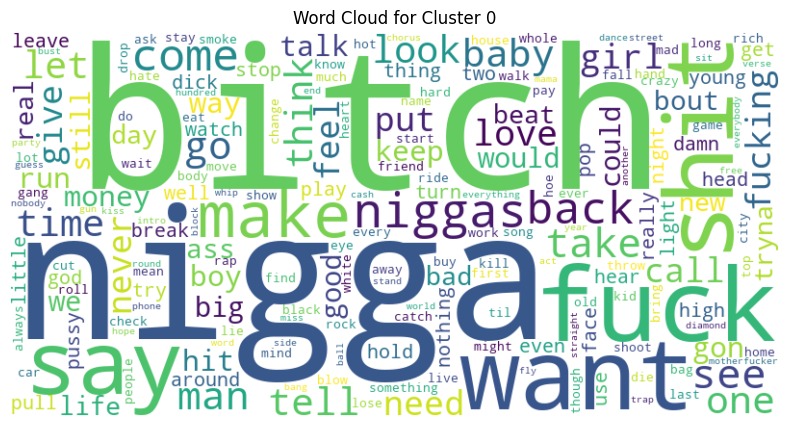

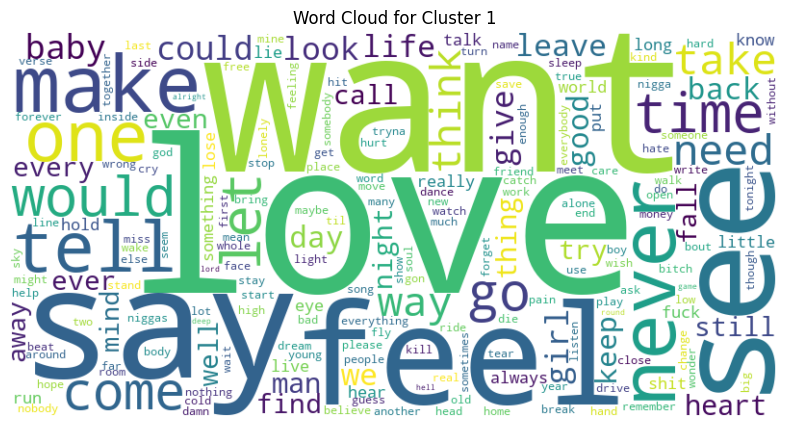

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['cluster'] == cluster_number]['token_lyrics']
    
    # Flatten the list of words for the cluster
    words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    word_freq = Counter(words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(optimal_k):
    plot_wordcloud(cluster)

#### ArtistCloud Visualization

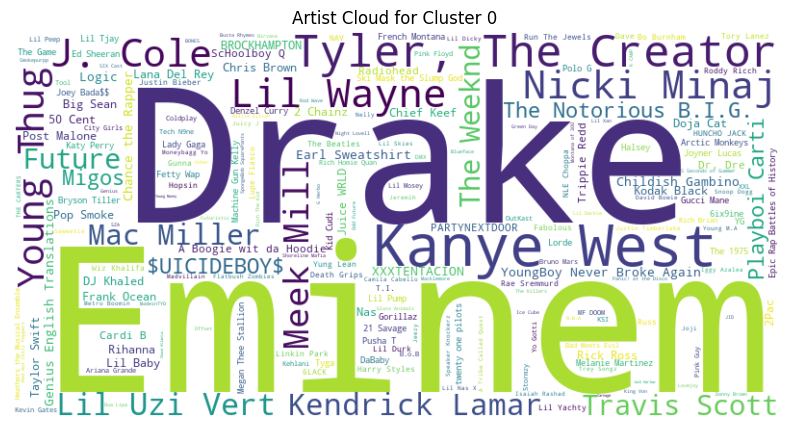

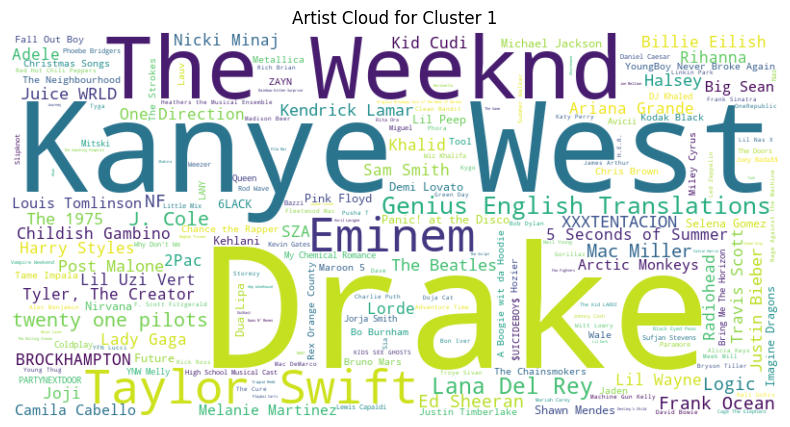

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['cluster'] == cluster_number]['artist']
    
    # # Flatten the list of words for the cluster
    # words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    artist_freq = Counter(cluster_lyrics)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(artist_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Artist Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(optimal_k):
    plot_wordcloud(cluster)

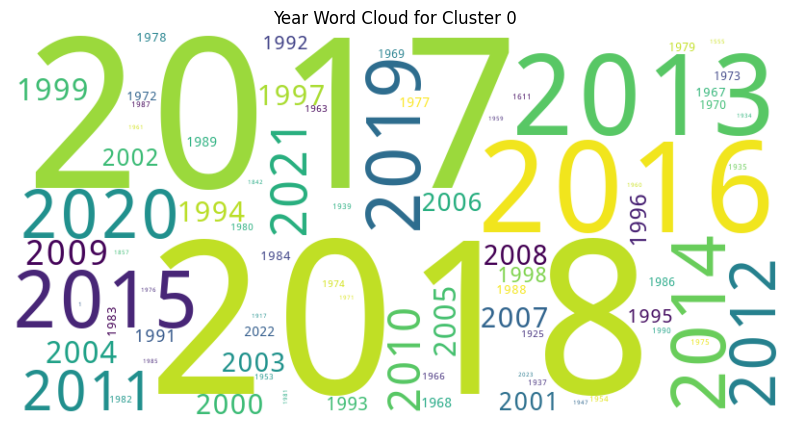

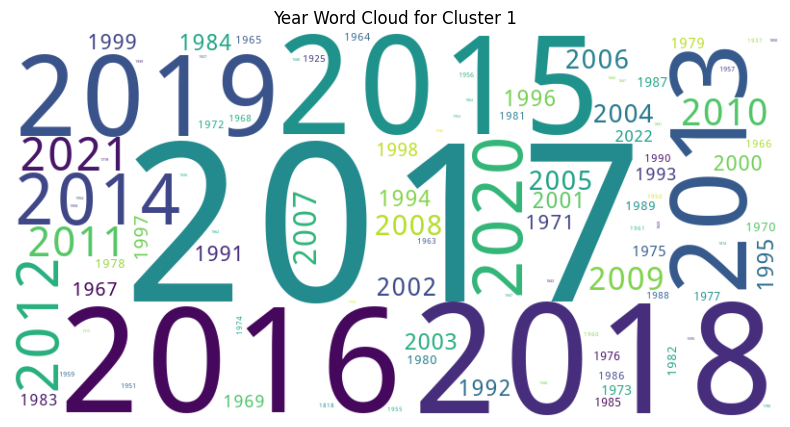

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

cluster_col = 'cluster'

# Convert years to string for word cloud
df_lyrics_clean_null['year_str'] = df_lyrics_clean_null['year'].astype(str)

def plot_year_wordcloud(cluster_number):
    years = df_lyrics_clean_null[df_lyrics_clean_null[cluster_col] == cluster_number]['year_str']
    year_freq = Counter(years)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(year_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Year Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word cloud for each cluster
for cluster in sorted(df_lyrics_clean_null[cluster_col].unique()):
    plot_year_wordcloud(cluster)

### Train Agglomerative Clustering

Performing Agglomerative Clustering with linkage: ward


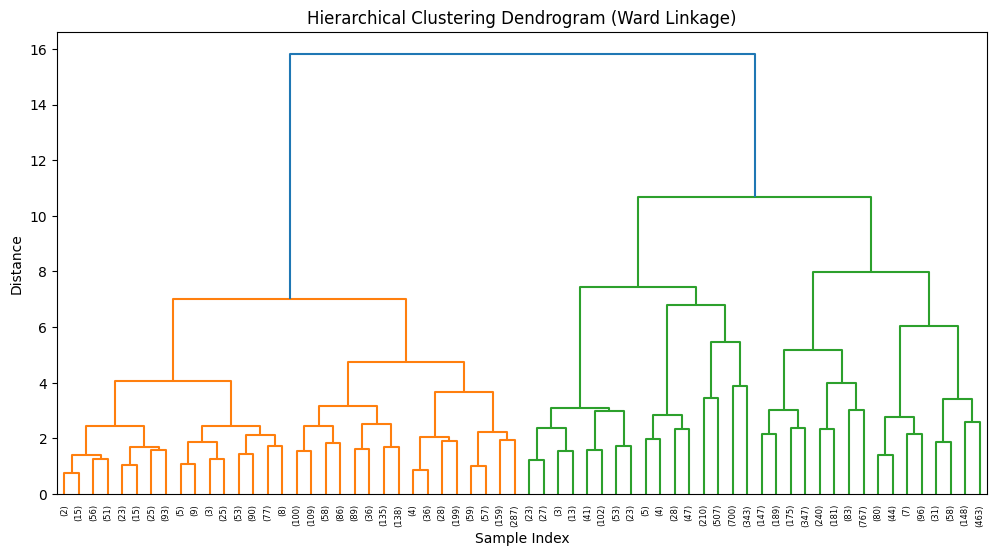

The average silhouette score for ward linkage is: 0.13483163730254913

Performing Agglomerative Clustering with linkage: complete


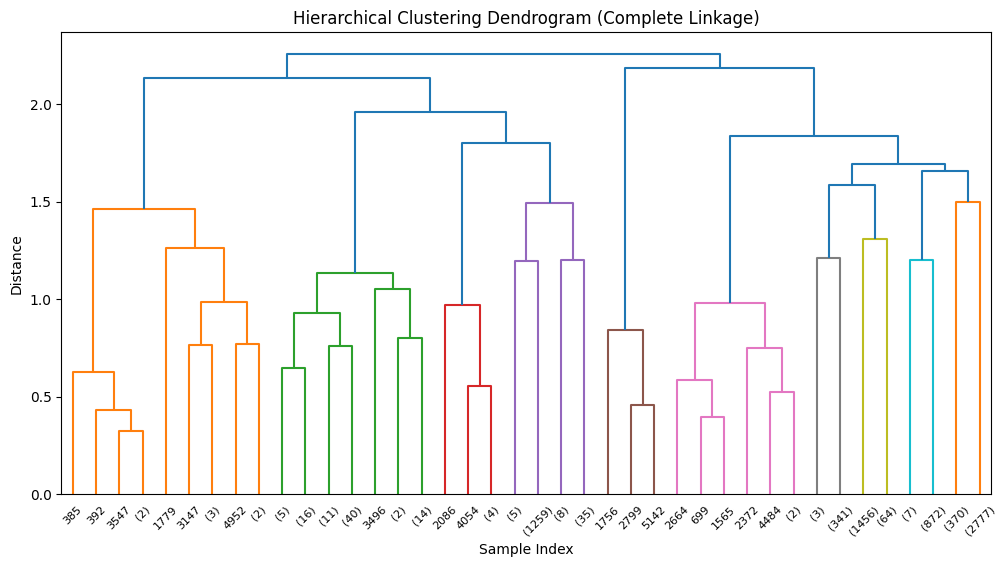

The average silhouette score for complete linkage is: -0.011897484156265074

Performing Agglomerative Clustering with linkage: average


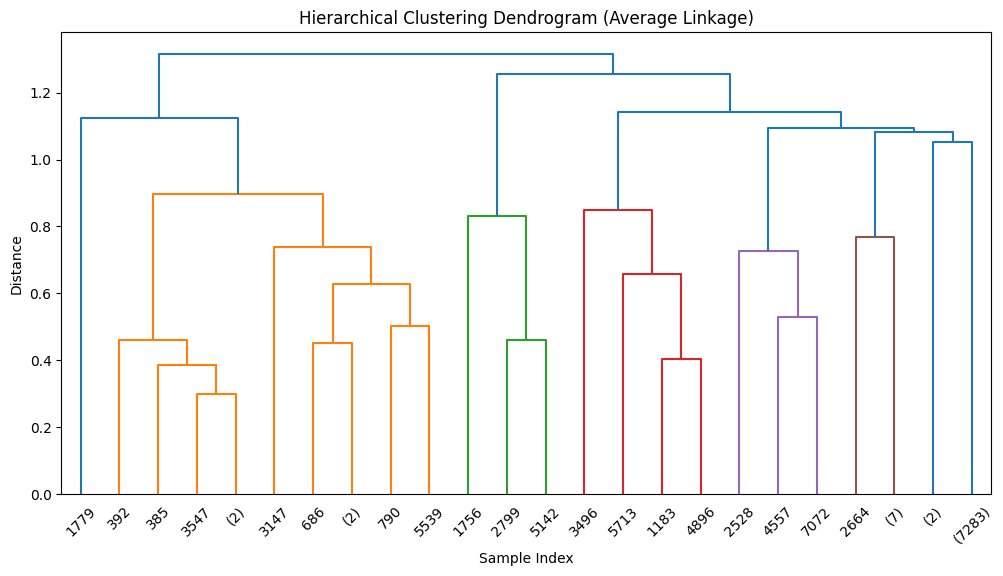

The average silhouette score for average linkage is: 0.6403977906343744

Performing Agglomerative Clustering with linkage: single


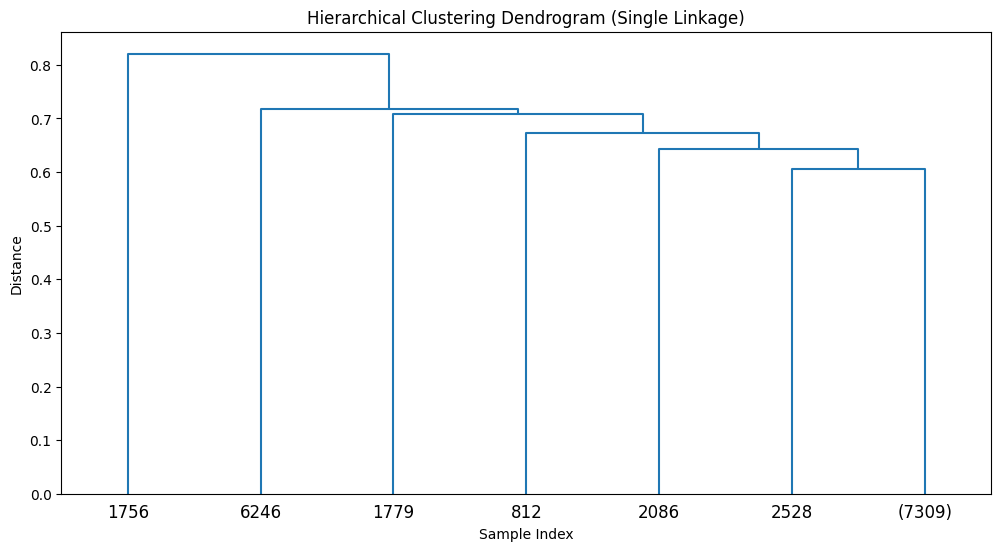

The average silhouette score for single linkage is: 0.6910428051546385



title             artist  year   views  \
0               Untitled  Rex Orange County  2017  260112   
1             Dandelions            Ruth B.  2017  221563   
2                 I Like            G Herbo  2017  197179   
3                Kiss Me         Ed Sheeran  2011  402274   
4  I Say A Little Prayer    Aretha Franklin  1968  315395   

                                              lyrics  \
0  i make enough mistakes\nand it feels like she'...   
1  \nmaybe it's the way you say my name\nmaybe it...   
2  \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3  \none, two, three, four\n\nsettle down with me...   
4  \ni say a little prayer for you\n\nthe moment ...   

                                        token_lyrics  random_cluster  \
0  [make, enough, mistake, feel, one, hear, thing...               0   
1  [maybe, way, say, name, maybe, way, play, game...               1   
2  [herbo, herbo, herbo, bitch, bitch, name, herb...               0   
3  [one, two, three, four, settle, cover, cuddle,...               0   
4  [say, little, prayer, moment, wake, put, makeu...               0   

                                     lyrics_combined  \
0  make enough mistake feel one hear thing say re...   
1  maybe way say name maybe way play game good ne...   
2  herbo herbo herbo bitch bitch name herbo nasty...   
3  one two three four settle cover cuddle lie hol...   
4  say little prayer moment wake put makeup makeu...   

                                              vector  cluster year_str  \
0  [0.041486792, -0.0009029907, -0.07233092, 0.01...        1     2017   
1  [-0.004927889, -0.0072442484, -0.10475183, 0.0...        1     2017   
2  [0.07612607, 0.0132161155, -0.03090201, 0.0247...        0     2017   
3  [-0.010548638, -0.014927377, -0.12462924, 0.03...        1     2011   
4  [0.010364652, -0.012142674, -0.12036573, 0.052...        1     1968   

   ward_cluster  complete_cluster  average_cluster  single_cluster  
0             0                 0                0               0  
1             1                 1                0               0  
2             0                 0                0               0  
3             1                 0                0               0  
4             1                 0                0               0

In [152]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Define a function to perform clustering and plot dendrogram for a given linkage method
def perform_agglomerative_clustering(linkage_method):
    print(f"Performing Agglomerative Clustering with linkage: {linkage_method}")
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(X, method=linkage_method)
    
    # Plot the dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method.capitalize()} Linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()
    
    # Fit Agglomerative Clustering
    hierarchical = AgglomerativeClustering(linkage=linkage_method)
    labels = hierarchical.fit_predict(X)
    
    # Add cluster labels to the DataFrame
    df_lyrics_clean_null[f'{linkage_method}_cluster'] = labels
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"The average silhouette score for {linkage_method} linkage is: {silhouette_avg}\n")

# Perform clustering with different linkage methods
for method in ['ward', 'complete', 'average', 'single']:
    perform_agglomerative_clustering(linkage_method=method)

# Display the first few rows with cluster labels
df_lyrics_clean_null.head()

#### Cluster Visualization

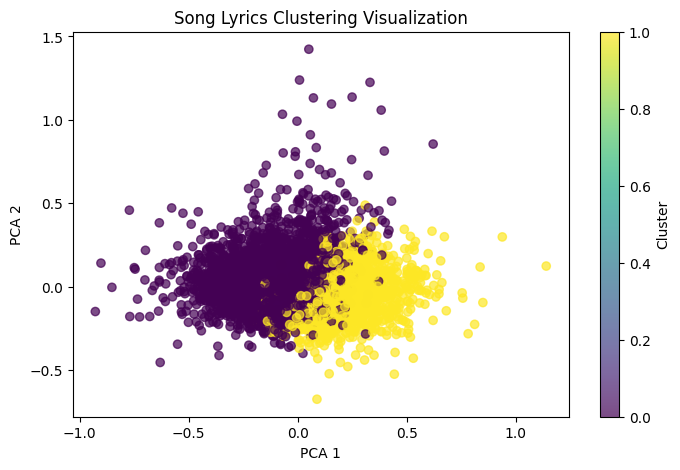

In [153]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_lyrics_clean_null['ward_cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Song Lyrics Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()

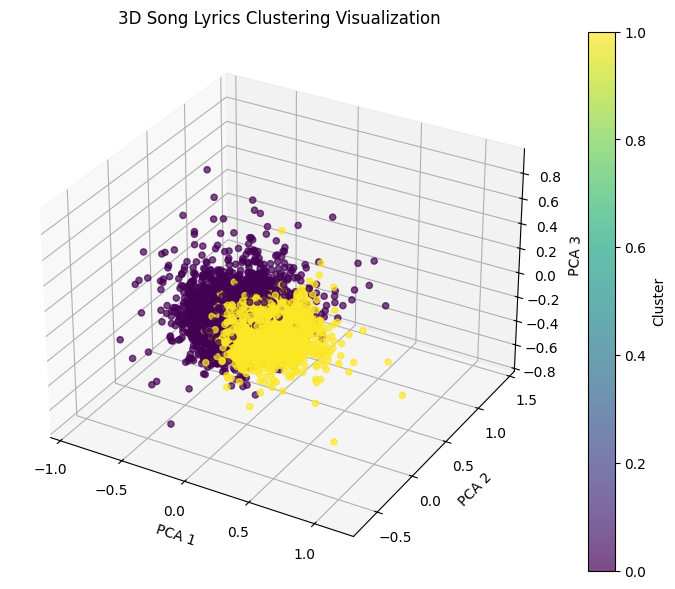

In [154]:
# Reduce to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=df_lyrics_clean_null['ward_cluster'], cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Song Lyrics Clustering Visualization")

# Add color bar
plt.colorbar(scatter, label="Cluster")
plt.show()

#### WordCloud Visualization

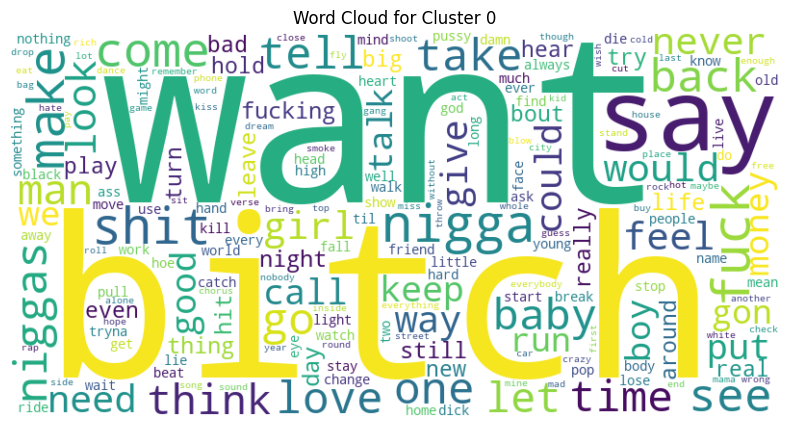

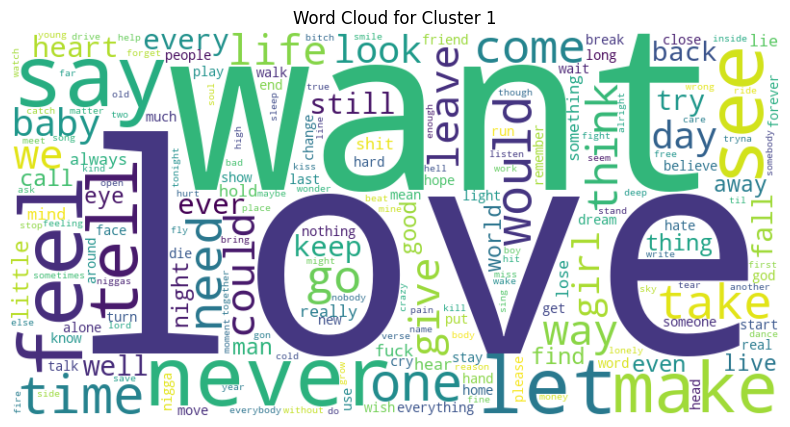

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['ward_cluster'] == cluster_number]['token_lyrics']
    
    # Flatten the list of words for the cluster
    words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    word_freq = Counter(words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(optimal_k): 
    plot_wordcloud(cluster)

#### ArtistCloud Visualization

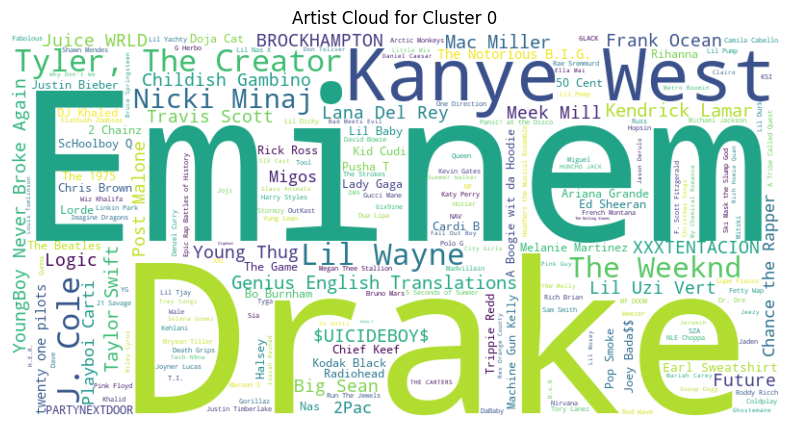

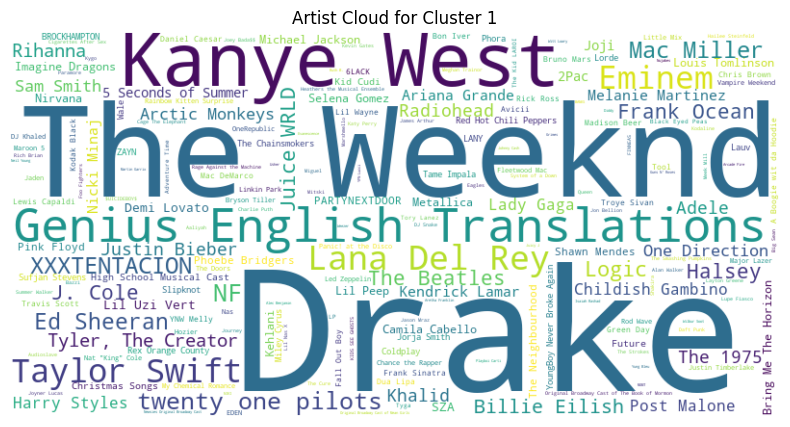

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['ward_cluster'] == cluster_number]['artist']
    
    # # Flatten the list of words for the cluster
    # words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    artist_freq = Counter(cluster_lyrics)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(artist_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Artist Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(optimal_k):
    plot_wordcloud(cluster)

#### YearCloud Visualization

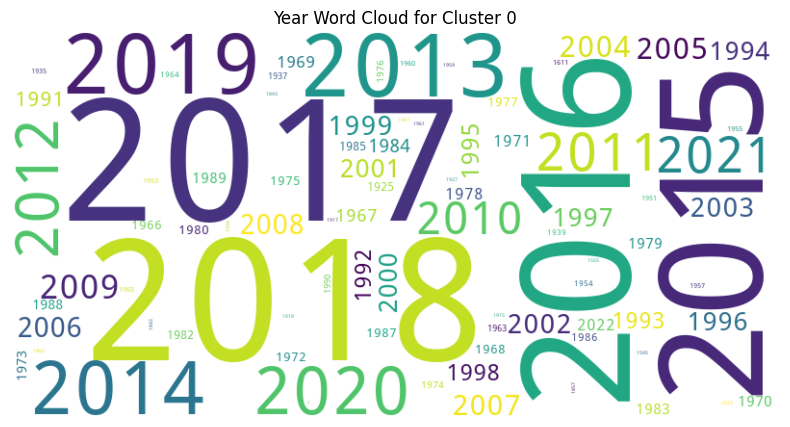

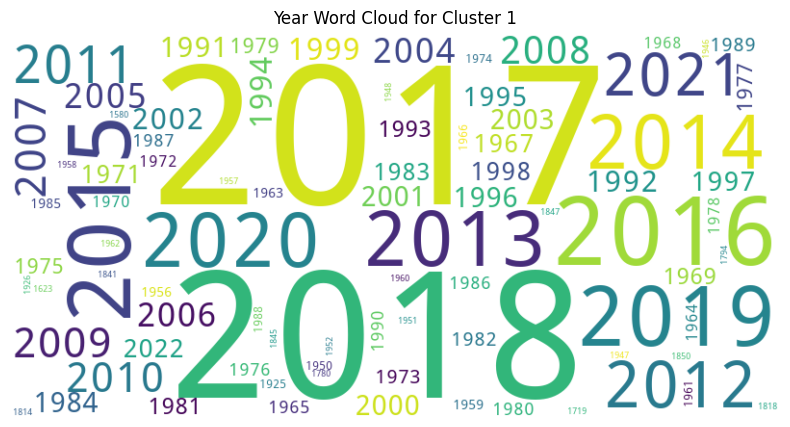

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

cluster_col = 'ward_cluster'

# Convert years to string for word cloud
df_lyrics_clean_null['year_str'] = df_lyrics_clean_null['year'].astype(str)

def plot_year_wordcloud(cluster_number):
    years = df_lyrics_clean_null[df_lyrics_clean_null[cluster_col] == cluster_number]['year_str']
    year_freq = Counter(years)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(year_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Year Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word cloud for each cluster
for cluster in sorted(df_lyrics_clean_null[cluster_col].unique()):
    plot_year_wordcloud(cluster)

## Train DBSCAN

Running DBSCAN parameter grid search...

Top 5 parameter combinations by silhouette score:
eps=0.35, min_samples=4: 2 clusters, 153 noise points (2.1%), silhouette=0.674
eps=0.35, min_samples=3: 2 clusters, 149 noise points (2.0%), silhouette=0.674
eps=0.45, min_samples=3: 2 clusters, 36 noise points (0.5%), silhouette=0.636
eps=0.20, min_samples=8: 2 clusters, 1479 noise points (20.2%), silhouette=0.425
eps=0.20, min_samples=7: 2 clusters, 1451 noise points (19.8%), silhouette=0.423

Best parameters: eps=0.35, min_samples=4, silhouette=0.674


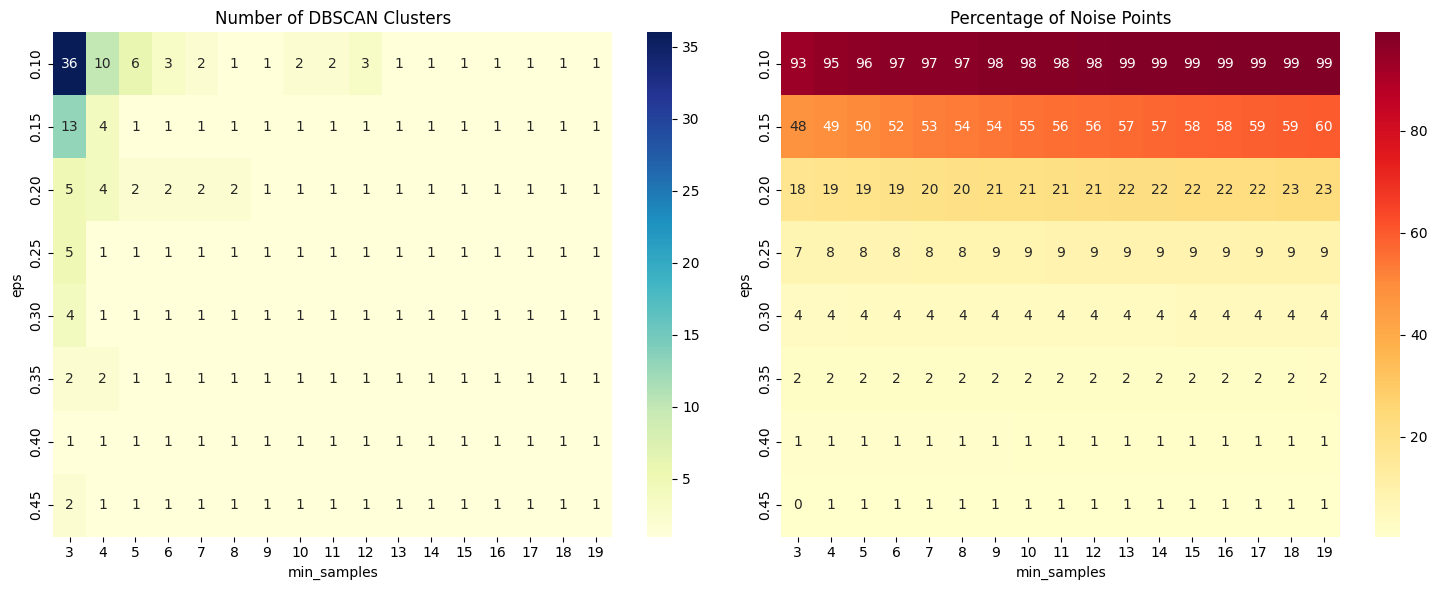

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Use a wider range for eps and min_samples
eps_range = np.arange(0.1, 0.5, 0.05)  # Wider range with smaller step size
min_samples_range = range(3, 20)  # Wider range for min_samples

# Initialize dictionaries to store results
results = []
clusters_by_param = defaultdict(list)  # To track number of clusters by parameter
noise_by_param = defaultdict(list)     # To track noise percentage by parameter

print("Running DBSCAN parameter grid search...")
for eps in eps_range:
    for min_samples in min_samples_range:
        # Train DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Calculate statistics
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_percent = (n_noise / len(labels)) * 100
        
        # Store for visualization
        clusters_by_param[eps].append(n_clusters)
        noise_by_param[eps].append(noise_percent)
        
        # Only calculate silhouette score for valid clusterings with non-noise points
        score = -1
        non_noise_points = labels != -1
        if n_clusters >= 2 and np.sum(non_noise_points) > n_clusters:
            try:
                score = silhouette_score(X[non_noise_points], labels[non_noise_points])
                results.append((eps, min_samples, n_clusters, n_noise, noise_percent, score))
            except:
                # In case of errors (sometimes happens with extreme parameters)
                pass
        else:
            results.append((eps, min_samples, n_clusters, n_noise, noise_percent, -1))

# Filter and sort valid results by silhouette score
valid_results = [r for r in results if r[5] > 0]  # Filter results with valid silhouette scores

if valid_results:
    valid_results.sort(key=lambda x: x[5], reverse=True)
    best_eps, best_min_samples, n_clusters, n_noise, noise_percent, best_score = valid_results[0]
    
    print("\nTop 5 parameter combinations by silhouette score:")
    for eps, min_samples, n_clusters, n_noise, noise_percent, score in valid_results[:5]:
        print(f"eps={eps:.2f}, min_samples={min_samples}: {n_clusters} clusters, "
              f"{n_noise} noise points ({noise_percent:.1f}%), silhouette={score:.3f}")
    
    print(f"\nBest parameters: eps={best_eps:.2f}, min_samples={best_min_samples}, "
          f"silhouette={best_score:.3f}")
else:
    print("\nNo valid parameter combinations found with 2+ clusters and non-noise points.")
    
    # Find parameters that got closest to working
    results.sort(key=lambda x: (-(x[2]), x[4])) # Sort by max clusters and min noise
    alt_eps, alt_min_samples = results[0][0], results[0][1]
    print(f"Try using: eps={alt_eps:.2f}, min_samples={alt_min_samples} (produced {results[0][2]} clusters with {results[0][4]:.1f}% noise)")

# Visualize the parameter search results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Heat map of number of clusters
eps_values = list(clusters_by_param.keys())
cluster_matrix = np.array([clusters_by_param[eps] for eps in eps_values])

sns.heatmap(cluster_matrix, annot=True, fmt="d", cmap="YlGnBu", 
           xticklabels=min_samples_range, yticklabels=[f"{eps:.2f}" for eps in eps_values],
           ax=axes[0])
axes[0].set_title("Number of DBSCAN Clusters")
axes[0].set_xlabel("min_samples")
axes[0].set_ylabel("eps")

# 2. Heat map of noise percentage
noise_matrix = np.array([noise_by_param[eps] for eps in eps_values])

sns.heatmap(noise_matrix, annot=True, fmt=".0f", cmap="YlOrRd",
           xticklabels=min_samples_range, yticklabels=[f"{eps:.2f}" for eps in eps_values],
           ax=axes[1])
axes[1].set_title("Percentage of Noise Points")
axes[1].set_xlabel("min_samples")
axes[1].set_ylabel("eps")

plt.tight_layout()
plt.show()

In [158]:
from sklearn.cluster import DBSCAN

# Train DBSCAN
def train_dbscan(eps, min_samples):
    print(f"Training DBSCAN with eps={eps} and min_samples={min_samples}")
    
    # Initialize DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    # Fit DBSCAN and predict cluster labels
    labels = dbscan.fit_predict(X)
    
    # Add cluster labels to the DataFrame
    df_lyrics_clean_null['dbscan_cluster'] = labels
    
    # Calculate silhouette score (only if there are more than 1 cluster)
    if len(set(labels)) > 1 and -1 not in set(labels):  # Exclude noise (-1) from silhouette calculation
        silhouette_avg = silhouette_score(X, labels)
        print(f"Silhouette Score: {silhouette_avg}")
    else:
        print("Silhouette Score cannot be calculated (only one cluster or all points are noise).")
    
    # Print the number of clusters and noise points
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")
    
    return labels

# Tuned parameters
eps = 0.35
min_samples = 4
dbscan_labels = train_dbscan(eps=eps, min_samples=min_samples)

# Display the first few rows with DBSCAN cluster labels
df_lyrics_clean_null.head()

Training DBSCAN with eps=0.35 and min_samples=4
Silhouette Score cannot be calculated (only one cluster or all points are noise).
Number of clusters: 2
Number of noise points: 153


title             artist  year   views  \
0               Untitled  Rex Orange County  2017  260112   
1             Dandelions            Ruth B.  2017  221563   
2                 I Like            G Herbo  2017  197179   
3                Kiss Me         Ed Sheeran  2011  402274   
4  I Say A Little Prayer    Aretha Franklin  1968  315395   

                                              lyrics  \
0  i make enough mistakes\nand it feels like she'...   
1  \nmaybe it's the way you say my name\nmaybe it...   
2  \nyeah, herbo\ng herbo, g herbo\nyeah, i got b...   
3  \none, two, three, four\n\nsettle down with me...   
4  \ni say a little prayer for you\n\nthe moment ...   

                                        token_lyrics  random_cluster  \
0  [make, enough, mistake, feel, one, hear, thing...               0   
1  [maybe, way, say, name, maybe, way, play, game...               1   
2  [herbo, herbo, herbo, bitch, bitch, name, herb...               0   
3  [one, two, three, four, settle, cover, cuddle,...               0   
4  [say, little, prayer, moment, wake, put, makeu...               0   

                                     lyrics_combined  \
0  make enough mistake feel one hear thing say re...   
1  maybe way say name maybe way play game good ne...   
2  herbo herbo herbo bitch bitch name herbo nasty...   
3  one two three four settle cover cuddle lie hol...   
4  say little prayer moment wake put makeup makeu...   

                                              vector  cluster year_str  \
0  [0.041486792, -0.0009029907, -0.07233092, 0.01...        1     2017   
1  [-0.004927889, -0.0072442484, -0.10475183, 0.0...        1     2017   
2  [0.07612607, 0.0132161155, -0.03090201, 0.0247...        0     2017   
3  [-0.010548638, -0.014927377, -0.12462924, 0.03...        1     2011   
4  [0.010364652, -0.012142674, -0.12036573, 0.052...        1     1968   

   ward_cluster  complete_cluster  average_cluster  single_cluster  \
0             0                 0                0               0   
1             1                 1                0               0   
2             0                 0                0               0   
3             1                 0                0               0   
4             1                 0                0               0   

   dbscan_cluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [159]:
df_lyrics_clean_null["dbscan_cluster"].value_counts()

dbscan_cluster
 0    7158
-1     153
 1       4
Name: count, dtype: int64


Testing DBSCAN with balanced parameters: eps=0.35, min_samples=4
Results: 2 clusters, 153 noise points (2.1%)
Silhouette Score: 0.6739


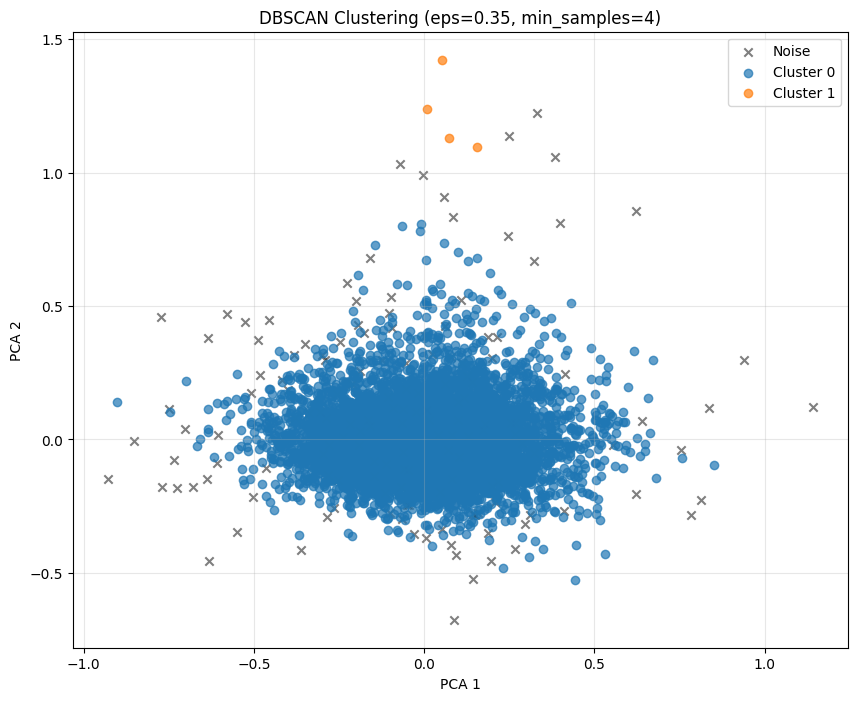

In [160]:
# Based on heatmaps, let's try parameters that balance clusters vs. noise
balanced_eps = 0.35  # Choose from heatmap visualization
balanced_min_samples = 4  # Choose from heatmap visualization

print(f"\nTesting DBSCAN with balanced parameters: eps={balanced_eps}, min_samples={balanced_min_samples}")
dbscan = DBSCAN(eps=balanced_eps, min_samples=balanced_min_samples)
labels = dbscan.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Results: {n_clusters} clusters, {n_noise} noise points ({n_noise/len(labels)*100:.1f}%)")

# Add cluster labels to the DataFrame
df_lyrics_clean_null['dbscan_cluster'] = labels

# If we found clusters, calculate silhouette score if possible
if n_clusters >= 2:
    non_noise_points = labels != -1
    if np.sum(non_noise_points) > n_clusters:
        try:
            silhouette_avg = silhouette_score(X[non_noise_points], labels[non_noise_points])
            print(f"Silhouette Score: {silhouette_avg:.4f}")
        except:
            print("Could not calculate silhouette score")

# Visualize selected clustering with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
# Plot noise points
noise_mask = (labels == -1)
plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], 
            c='black', marker='x', alpha=0.5, label='Noise')

# Plot clusters with different colors
for cluster_id in set(labels):
    if cluster_id != -1:  # Skip noise points
        cluster_mask = (labels == cluster_id)
        plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
                   alpha=0.7, label=f'Cluster {cluster_id}')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"DBSCAN Clustering (eps={balanced_eps}, min_samples={balanced_min_samples})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

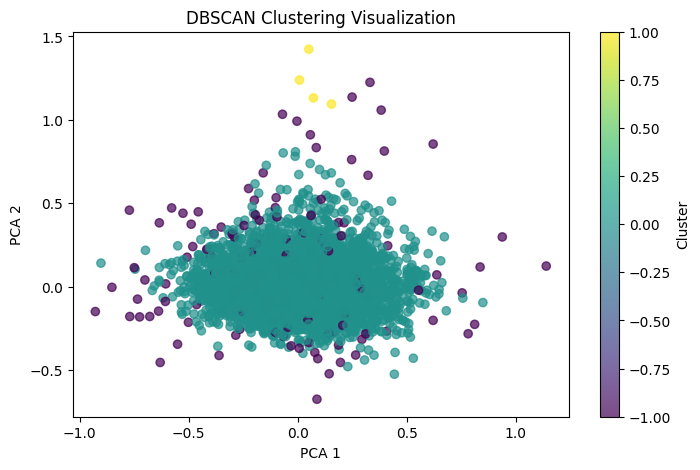

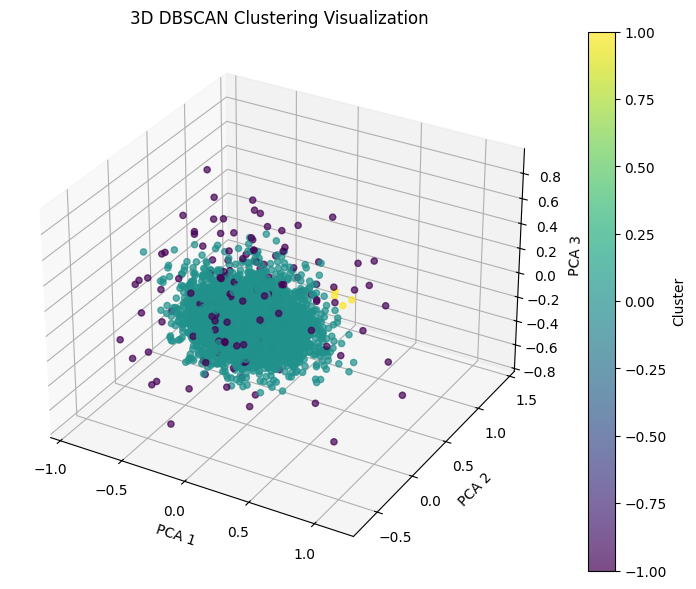

In [161]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot 2D visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()

# Reduce to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=dbscan_labels, cmap='viridis', alpha=0.7)

# Add labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D DBSCAN Clustering Visualization")

# Add color bar
plt.colorbar(scatter, label="Cluster")
plt.show()

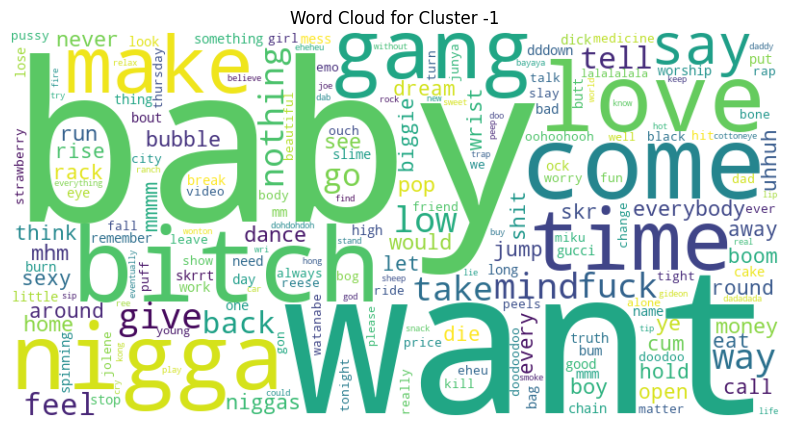

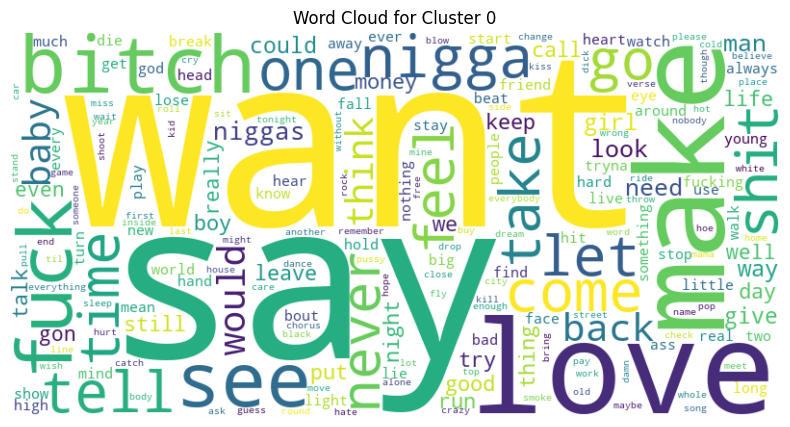

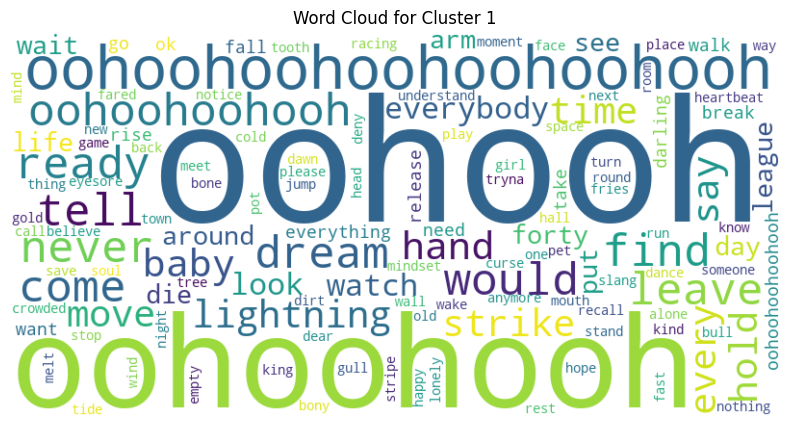

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['dbscan_cluster'] == cluster_number]['token_lyrics']
    
    # Flatten the list of words for the cluster
    words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    word_freq = Counter(words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(-1, 2):
    plot_wordcloud(cluster)

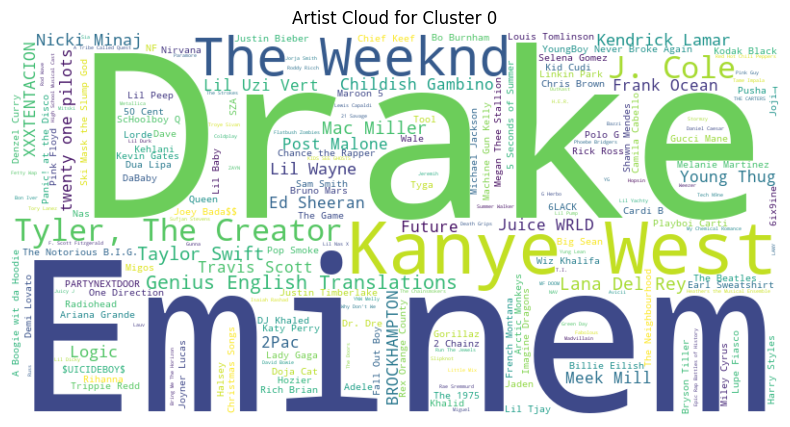

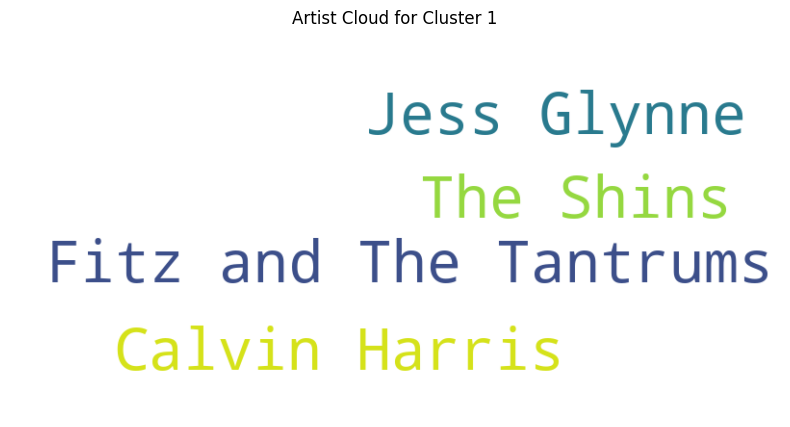

In [163]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a specific cluster
def plot_wordcloud(cluster_number):
    # Filter lyrics for the given cluster
    cluster_lyrics = df_lyrics_clean_null[df_lyrics_clean_null['dbscan_cluster'] == cluster_number]['artist']
    
    # # Flatten the list of words for the cluster
    # words = [word for tokens in cluster_lyrics for word in tokens]
    
    # Generate a word frequency dictionary
    artist_freq = Counter(cluster_lyrics)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(artist_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Artist Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word clouds for each cluster
for cluster in range(optimal_k):
    plot_wordcloud(cluster)

#### YearCloud Visualization

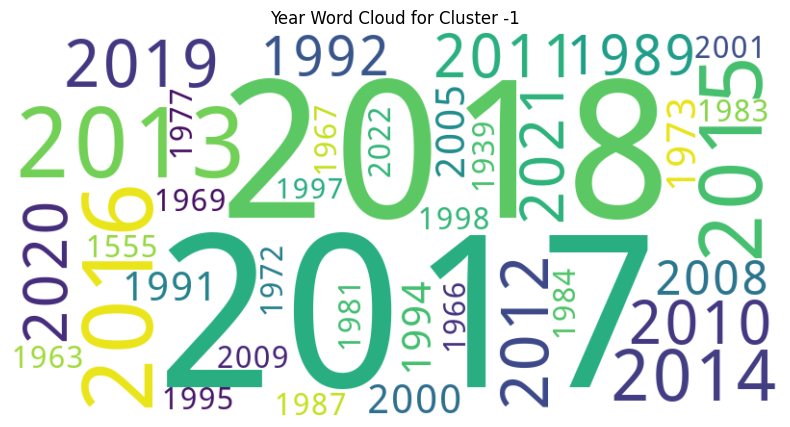

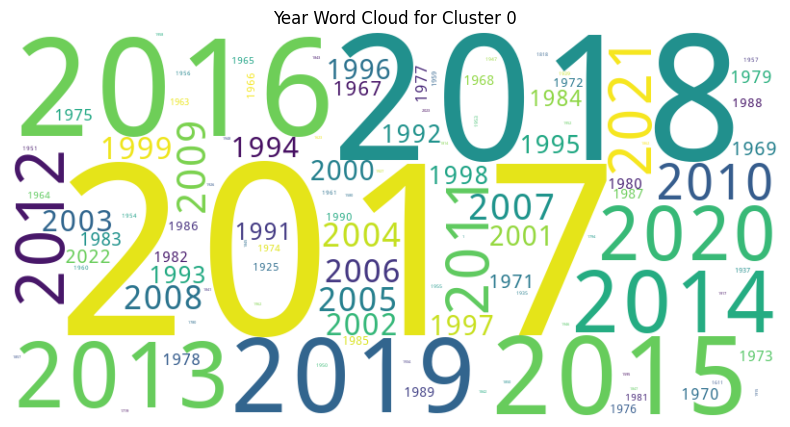

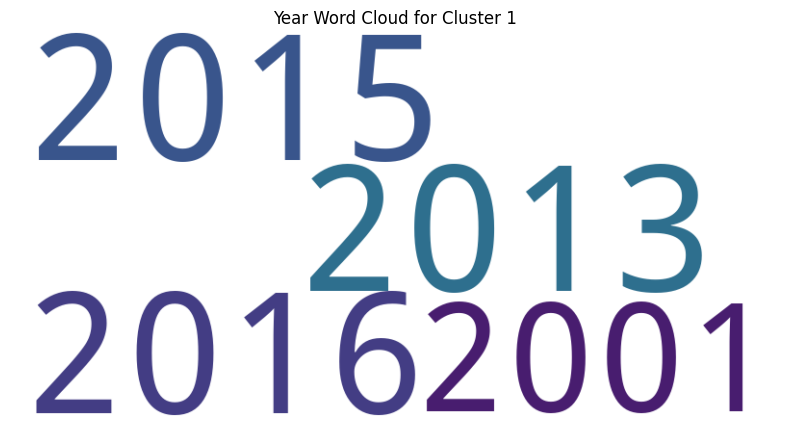

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

cluster_col = 'dbscan_cluster'

# Convert years to string for word cloud
df_lyrics_clean_null['year_str'] = df_lyrics_clean_null['year'].astype(str)

def plot_year_wordcloud(cluster_number):
    years = df_lyrics_clean_null[df_lyrics_clean_null[cluster_col] == cluster_number]['year_str']
    year_freq = Counter(years)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(year_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Year Word Cloud for Cluster {cluster_number}")
    plt.show()

# Plot word cloud for each cluster
for cluster in sorted(df_lyrics_clean_null[cluster_col].unique()):
    plot_year_wordcloud(cluster)

          count        mean        std     min     25%     50%     75%     max
cluster                                                                       
0        3513.0  2011.48961  37.657043     1.0  2012.0  2015.0  2018.0  2023.0
1        3802.0  2009.41636  20.829357  1580.0  2010.0  2015.0  2018.0  2022.0


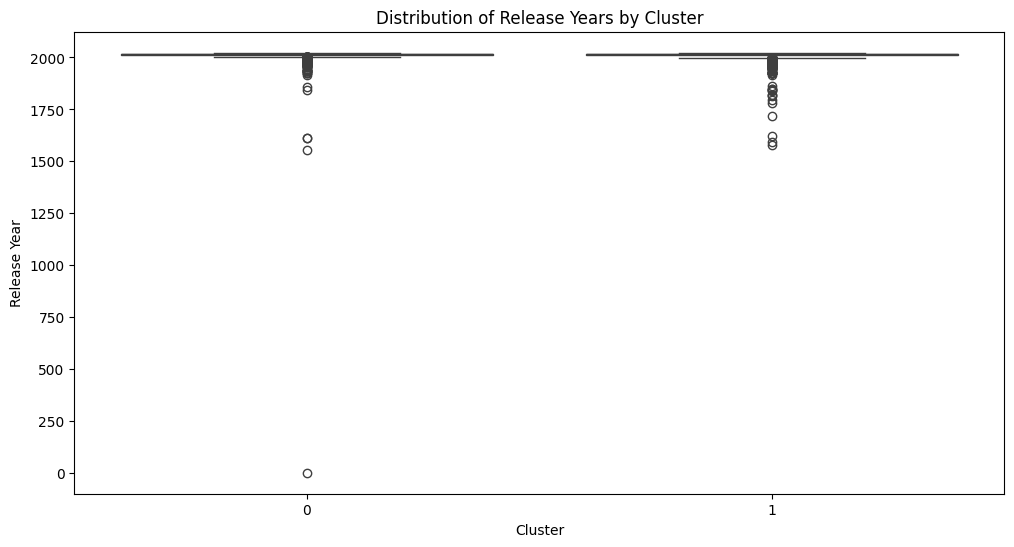

In [164]:
import seaborn as sns
# Group by cluster and calculate the average release year
cluster_year_stats = df_lyrics_clean_null.groupby('cluster')['year'].describe()
print(cluster_year_stats)

# Visualize the distribution of release years for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='year', data=df_lyrics_clean_null)
plt.title("Distribution of Release Years by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Release Year")
plt.show()

          count           mean            std       min        25%       50%  \
cluster                                                                        
0        3513.0  626088.985198  884621.436359  187583.0  246290.00  355604.0   
1        3802.0  576502.759600  752322.520311  187570.0  244677.75  344587.0   

               75%         max  
cluster                         
0        628234.00  17575634.0  
1        591550.25  14569727.0  


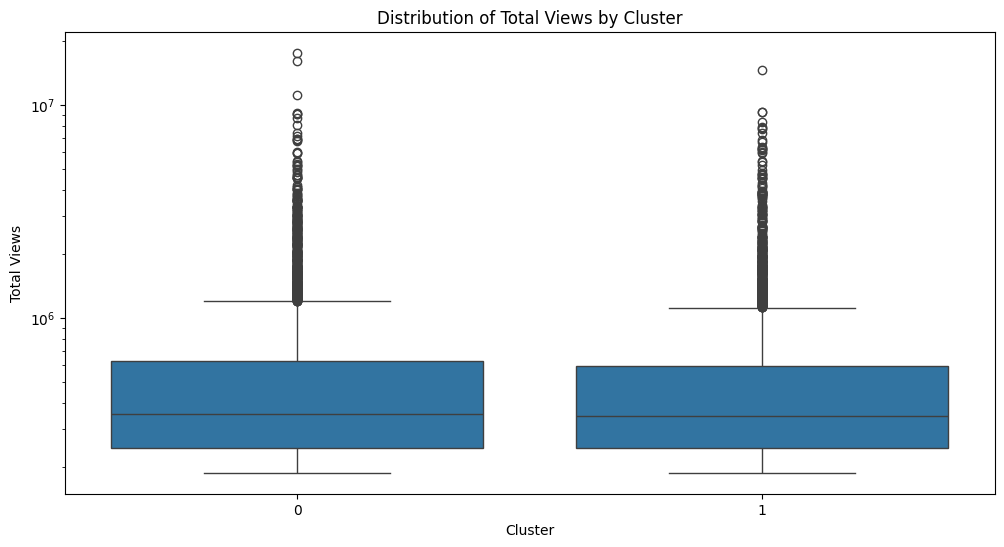

In [165]:
# Group by cluster and calculate statistics for views
cluster_view_stats = df_lyrics_clean_null.groupby('cluster')['views'].describe()
print(cluster_view_stats)

# Visualize the distribution of views for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='views', data=df_lyrics_clean_null)
plt.title("Distribution of Total Views by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Views")
plt.yscale('log')  # Use log scale if views have a wide range
plt.show()


In [166]:
# Calculate the total views per cluster
total_views_per_cluster = df_lyrics_clean_null.groupby('cluster')['views'].sum()
print(total_views_per_cluster)

cluster
0    2199450605
1    2191863492
Name: views, dtype: int64
